> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# VII: Neural Networks

<div style="text-align: right"> **Due date: Dec. 21, 2018.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 9 PM in the form of [ID_Name_HW7.ipynb].** </div> 

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2019-02-28 16:11:25.305204


## Problem description

We will implement a simple neural network for binary classification. Let me first see a behavior of a simple logistic regression method on a $\text{moon}$ dataset. This dataset has been widely used to test nonlinear classifier and clustering methods. We can synthetically generate the dataset with labels from the $\texttt{sklearn.linear_model}$. See the example shown below. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:
# dataset
np.random.seed(0)
X, y = sklearn.datasets.make_moons(300, noise = 0.25)

Let's viaualize the $\texttt{moon}$ dataset with the $\texttt{scatter}$ function from $\texttt{matplotlib.pyplot}$.

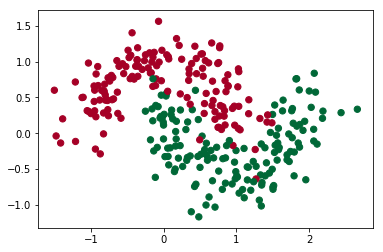

In [4]:
plt.scatter(X[:,0], X[:,1], s = 40, c=y, cmap=plt.cm.RdYlGn)

It seems hard to to classify this dataset with linear classifiers such as a logistic regression method. That is, it is hard to draw a straight line (i.e., decision boundaries) to divide training sets into two different regions pefectly. The $\texttt{sklearn.linear_model}$ provides a set of linear models. See the reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html. 

In [5]:
import sklearn.linear_model

Let's apply logistic regression to the $\texttt{moon}$ dataset and draw decision boundaries. You can use a help function ($\texttt{plot_decision_boundary}$) provided that takes three values (or functions) as inputs. $\texttt{pred_func}$ is an output of the classifiers. In logistic regression, it is the output value of sigmoid functions. Other two arguments, $\texttt{train_data}$ and $\texttt{color}$, are training datasets and color for each label in the dataset, respectively. See the example below.

In [6]:
# logistic regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [7]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func, train_data, color):
    # Set min and max values and give it some padding
    x_min, x_max = train_data[:, 0].min() - .5, train_data[:, 0].max() + .5
    y_min, y_max = train_data[:, 1].min() - .5, train_data[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=color, cmap=plt.cm.RdYlGn)

[1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0
 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1
 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1
 1 0 0 0]
[[ 9.40739792e-01 -7.10075482e-01]
 [ 1.72957509e-02 -3.27654670e-01]
 [ 8.43654190e-01  7.32706315e-01]
 [ 1.16362636e+00 -4.75390515e-01]
 [ 9.94626194e-01 -2.42538107e-01]
 [-1.21272339e+00 -1.15513393e-01]
 [ 1.41271254e+00 -4.14047958e-01]
 [ 8.49967544e-01 -3.45202996e-01]
 [ 6.71013843e-01  7.26809847e-01]
 [-9.07607849e-01  9.31146822e-01]
 [ 1.78119700e+00  1.38988728e-01]
 [ 8.

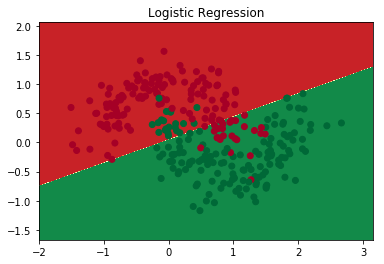

In [8]:
# plot boundary
plot_decision_boundary(pred_func = clf.predict, train_data = X, color = y)
plt.title("Logistic Regression")
print(clf.predict(X))
print(X)

As you can see, we need nonlinear classifiers to classify such datasets. Let's implement a simple neural network and check that it gives a nonlinear classifier. The network we will implement consists series of fully connected layers followed by nonlinear activation functions. 

### I. Neural networks using gradiend descent.
(*90 points*) P1.1 Implement a multilayer perceptron method using gradient descent. A detailed description of the nework is shown below. Plot a decision boundary on the $\texttt{moon}$ dataset.

 > $H_1 = ReLU(X \cdot W_1 + b_1)$ where $ReLU$ is a rectified linear unit and $H_1$ is an output of the first hidden layer. 
 
 > $H_2 = \sigma(H_1 \cdot W_2 + b_2)$ where $\sigma$ is a sigmoid function and $H_2$ is an output of the second hidden layer.    
 
 > $\hat y = softmax(H_2 \cdot W_3 + b_3)$ where $softmax$ is a softmax function and $\hat y$ is an output of the network.
 > The $j$th element of the softmax function is defined as follows.
 >
 > $softmax(z)_j= \frac{\exp^{z_j}}{\sum_{k=1}^{K} \exp^{z_k}}$ for $j=1,\dots,K$,
 >
 > where $z_j$ is the $j$th element of the input vector $z\in \mathcal{R}^K$ and $K$ is the number of class.
 
Note that $softmax$ can be can be seen as a general version of the sigmoid function, and it is typically used for multiclass classification. 
 
 > $W$ and $b$ are weights and bias, respectively.   
 
 > Initialization for weight: Standard normal (use $\texttt{np.random.randn}$.)
 
 > Initialization for bias: 0   
 
 > Input size: 2
 
 > The first hidden layer size: 10
 
 > The second hidden layer size: 10
 
 > Output size: 2
 
 > Loss function: Cross entropy loss (or equivently log loss). For each training sample, we define a log loss function as follows:
 >
 > $L = -\sum_{k=1}^K I_k \log(softmax(z)_k)$
 >
 > where $I_k$ ia an indicator function that has the value of 1 iff the training sample belongs to the class $k$ and 0 otherwise.
 
 > Optimization: Gradient descent
 
 > Learning rate = 0.001
 
 > Number of epochs = 50000

(*5 points*) P1.2 Plot training losses over the number of epochs. 

In [9]:
# total number of samples (moon data) = 300
np.random.seed(0)
W1=np.random.randn(2,3)
b1=np.zeros((1,3))
z1 = X.dot(W1) + b1
print(W1,b1)
print(z1.shape)

[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]] [[0. 0. 0.]]
(300, 3)


In [10]:
num_samples=X.shape[0]   # 300
input_dim=2
output_dim=2

eps=0.001
epoch=50000
LOSS=list()
def NN_model(x,y,hlayer_size):
    
    #initailization of W1~W3,b1~b3
    np.random.seed(0)
    W1=np.random.randn(2,hlayer_size) # W1 =(2,hsize)
    b1=np.zeros((1,hlayer_size))  # b1=()
    W2=np.random.randn(hlayer_size,hlayer_size)
    b2=np.zeros((1,hlayer_size))
    W3=np.random.randn(hlayer_size,2)
    b3=np.zeros((1, 2))
    
    
    #first hidden layer
    for i in range(0,epoch):
#       print('epoch:',i)
        
        #forwarding
        # first:  ReLU
        z1 = np.matmul(X,W1) + b1
        H1= z1 * (z1 > 0)
        
        #second hidden layer: sigmoid 
        z2 = np.matmul(H1,W2) + b2
        H2 = 1/(1+np.exp(-z2))

        #output layer :softmax
        z3 = np.matmul(H2,W3) + b3
        temp = np.exp(z3)
        prob = temp / np.sum(temp, axis=1, keepdims=True)

#        if (i%100==0):
        l=-np.log10(np.max(prob,axis=1))
        
        LOSS.append(np.sum(l))


        #back propagation
        dLossFunc = prob
        dLossFunc[range(300), y] -= 1  # dLoss => (300,2)
        dw3 = np.matmul(H2.T,dLossFunc)
        db3 = np.sum(dLossFunc, axis=0, keepdims=True)
        W3 -= eps*dw3
        b3 -= eps*db3

        dH2 = dLossFunc.dot(W3.T)    # dH2 => 300,n
        dz2 = dH2 * (1 - H2)*H2      # dz2=>
        dH1 = dz2.dot(W2.T)

        dw2 = np.matmul(H1.T,dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True) 
        W2 -= eps*dw2
        b2 -= eps*db2
        
        dz1 = dH1* (z1 > 0)
        dw1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0)    
        W1 -= eps*dw1
        b1 -= eps*db1 


        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2,'W3':W3, 'b3':b3}
#        if (i%100==0):
            

    return model


In [11]:
def my_forward(model,X):
        W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'],model['W3'], model['b3']
        #forwarding
        z1 = np.matmul(X,W1) + b1
        H1= z1 * (z1 > 0)
        #second hidden layer
        z2 = np.matmul(H1,W2) + b2
        H2 = 1/(1+np.exp(-z2))

        #output layer (softmax)
        z3 = np.matmul(H2,W3) + b3
        temp = np.exp(z3)
        prob = temp / np.sum(temp, axis=1, keepdims=True)
#        print(prob)

        return np.argmax(prob, axis=1)

In [12]:
# problem 1-1. hidden size=10 case
size=10
model = NN_model(X,y,size)
#print(model)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]


Text(0.5,1,'Hidden Layer size 10')

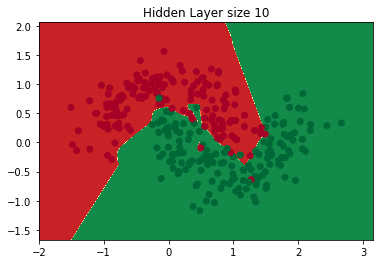

In [79]:
print(my_forward(model,X)-y)
plot_decision_boundary(lambda X: my_forward(model, X), train_data = X, color = y)
plt.title('Hidden Layer size %d' % size)
#print(LOSS)

Text(0,0.5,'loss')

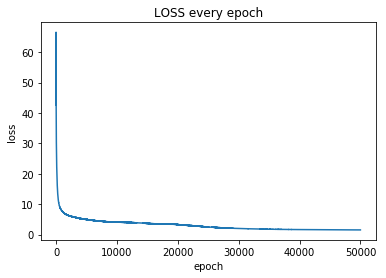

In [84]:
# P1-2. Plot training losses over the number of epochs
epoch_lin=np.linspace(1,50000,50000)
plt.plot(epoch_lin,LOSS)
plt.title('LOSS every epoch')
plt.xlabel('epoch')
plt.ylabel('loss')

### II. Play with your networks
(*5 points*) P2.1 Change size of hidden layers as follows, and plot decision boundaries. 
(1,1), (2,2), (3,3), (4,4), (5,5), (20,20), (50,50) where the first and second elements are size of first and second hidden layers, respectively. 

에러갯수는  51
에러갯수는  8
에러갯수는  6
에러갯수는  7
에러갯수는  10
에러갯수는  0
에러갯수는  0


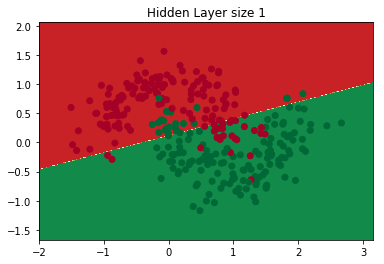

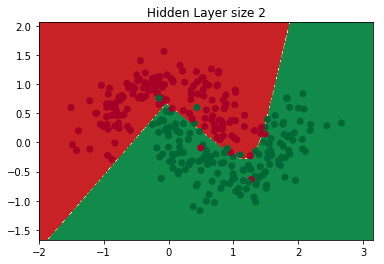

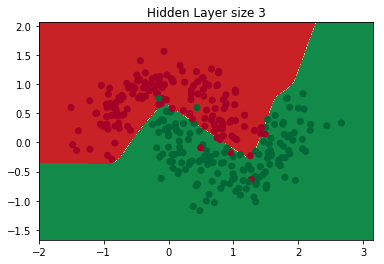

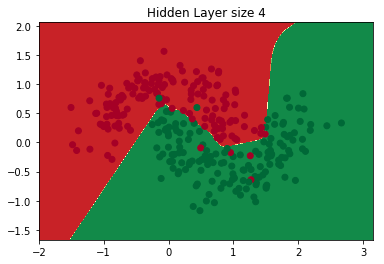

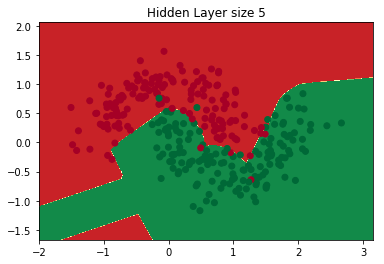

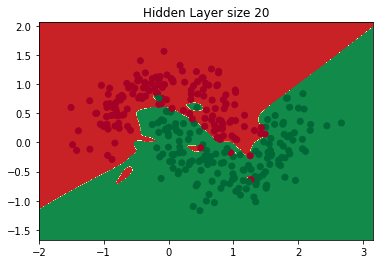

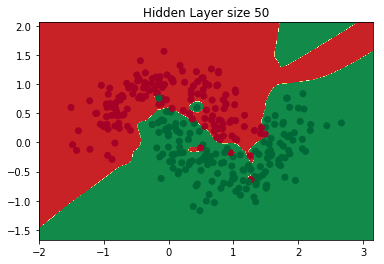

In [75]:
size = [1, 2, 3, 4, 5, 20, 50]
for j in (size):
    model = NN_model(X,y,j)
    error=np.count_nonzero(my_forward(model,X)-y)
    plt.figure(j)
    plot_decision_boundary(lambda X: my_forward(model, X), train_data = X, color = y)
    plt.title('Hidden Layer size %d' % j)
    print('에러갯수는 ', error)

In [ ]:

## discussion
"""
이번 과제는 Neural Network를 실제적으로 구현해보았다.

이번학기 배웠던 대부분의 알고리즘은 linear separable한 dataset에 대하여 분류하는 알고리즘을 짜봤지만
그렇지 않은 케이스인 non-linear한 dataset을 분류하는 방법론에 대해서 처음으로 분류를 시도했다.

지난 과제에서 구현했던 perceptron을 여러개의 층(layer)로 연결하여 각 input, output에 대해서 
몇가지 대표적인 activation function을 적용하여 node를 actiavation시켜봤다. 
과제에서 쓰인 함수는 ReLU, sigmoid, softmax 함수였다. 
그리고 LOSS fuction은 softmax함수와 같이 쓰이는 cross entropy function을 이용했다.
softmax와 cross entropy function은 매우 널리 쓰이는 방식이며 대표적인 CNN에서도 쓰고 있을 정도로 많이 쓰인다고 한다. 
ReLU도 빠짐 없이 등장하는 함수이다

과제 중간에 가장 어려웠던 부분은 벡터표현이 매우 까다로웠다는 점이다. 문제는 300개의 위치정보(X1,X2)와 그에 따른 색깔 y 정보가 주어지고
이를 적당한 NN를 만들어학습시키는 과제였다. 그래서 network의 layer의 갯수에 따라 분류하는 정도를 비교하였다.
1: 에러갯수는  51
2: 에러갯수는  8
3: 에러갯수는  6
4: 에러갯수는  7
5: 에러갯수는  10
20:에러갯수는  0
50:에러갯수는  0

일단 layer size가 비교적 작을때는 size=1을 제외하고 성능이 비슷하엿다. 
size=1일때는 예상대로 linear 분류기의 역할밖에 못하기 때문에 error의 갯수도 5배 이상 차이나는것을 확인할 수 있었고
나머지 size=2,3,4,5는 큰 차이가 없었다. size=5부터는 약간 overfitting문제가 발생하는것을 확인할 수 있었지만 성능에는 큰 차이가 없었다.

그리고 예상대로 size가 큰 부분은 error 없이 정확하게 예측하는 모습을 볼 수 있었다. 
하지만 그래프에서 볼 수 있듯이 overfitting문제가 존재하고 있다. 
결국 layer의 갯수가 높을수록 예측은 정확해지지만 overfitting 문제가 있다는것을 확인할 수 있었다.
따라서 이번 과제의 최적의 layer는 error의 갯수로 보나 그래프 개형으로 보나 size=3,4가 적당한것 같다고 결론을 내릴 수 있다.

"""